In [ ]:
try:
    import pandas as pd
except:
    import sys
    !pip install --yes --prefix {sys.prefix} pandas
    import pandas as pd


df = pd.read_csv("global_air_pollution.csv")

df.drop(['Country', 'City'], axis=1, inplace=True)
df.dropna(inplace=True)

def convert_category_to_numeric(category):
    mapping = {
        'Good': 5,
        'Moderate': 4,
        'Unhealthy for Sensitive Groups': 3,
        'Unhealthy': 2,
        'Very Unhealthy': 1,
        'Hazardous': 0
    }
    # Returns -1 for categories not in mapping
    return mapping.get(category, -1)

# Convert all AQI categories to numerical values
category_columns = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category',
                    'NO2 AQI Category', 'PM2.5 AQI Category']

for col in category_columns:
    df[col] = df[col].apply(convert_category_to_numeric)


df.to_csv('cleaned_dataset.csv', index=False)

df



,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,51,4,1,5,36,5,0,5,51,4
1,41,5,1,5,5,5,1,5,41,5
2,66,4,1,5,39,5,2,5,66,4
3,34,5,1,5,34,5,0,5,20,5
4,22,5,0,5,22,5,0,5,6,5
...,...,...,...,...,...,...,...,...,...,...
23458,184,2,3,5,154,2,2,5,184,2
23459,50,5,1,5,20,5,5,5,50,5
23460,50,5,1,5,22,5,1,5,50,5
23461,71,4,1,5,44,5,2,5,71,4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

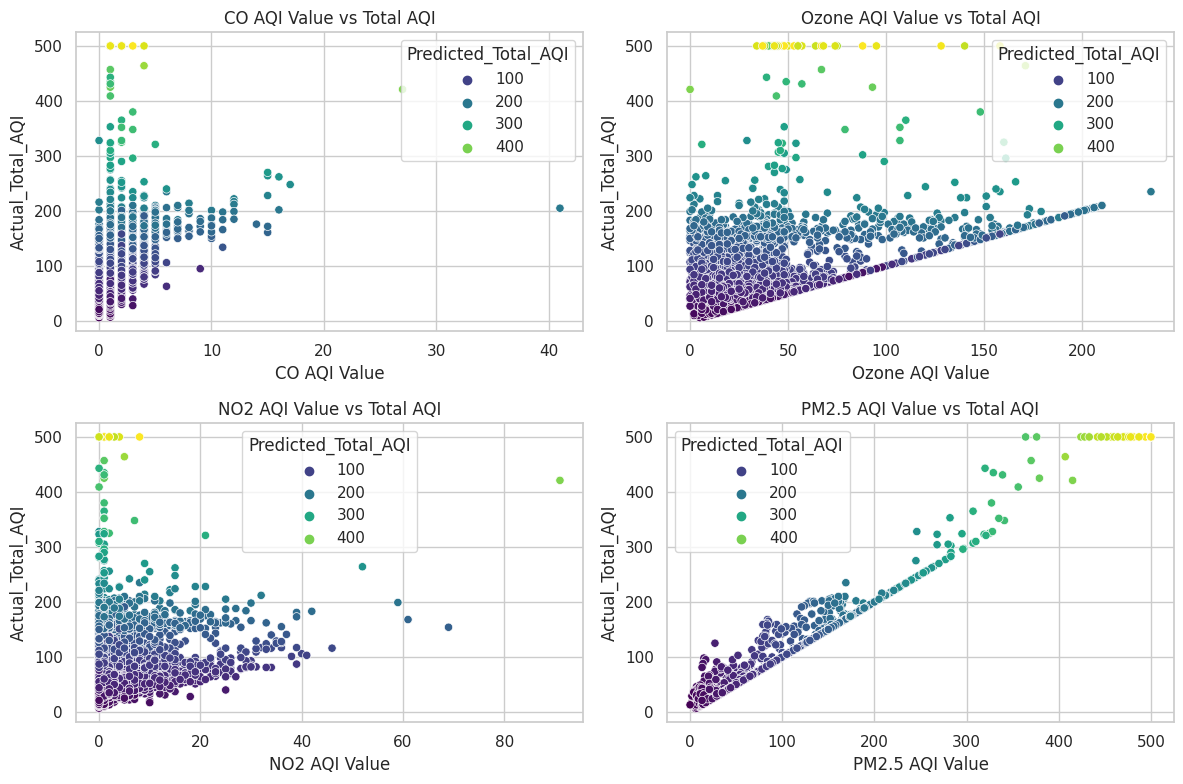

Mean Squared Error: 80.53703097322023


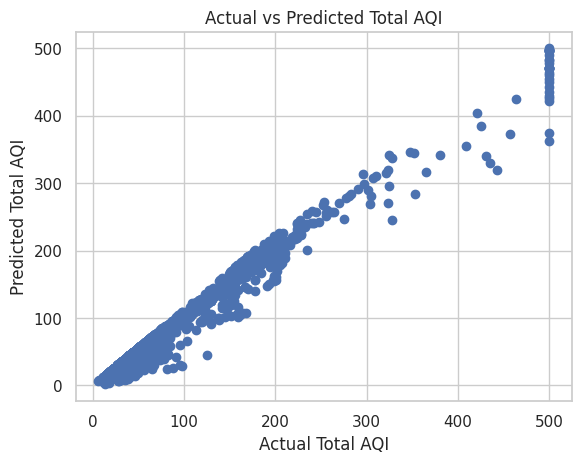

           Feature  Coefficient
0     CO AQI Value     0.051036
1  Ozone AQI Value     0.150168
2    NO2 AQI Value    -0.048765
3  PM2.5 AQI Value     0.980252


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from google.colab import files

files.download('cleaned_dataset.csv')

df = pd.read_csv('cleaned_dataset.csv')

X = df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]
y = df['AQI Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)


predictions = model.predict(X_test)

df_test = pd.DataFrame({'CO AQI Value': X_test['CO AQI Value'], 'Ozone AQI Value': X_test['Ozone AQI Value'],
                        'NO2 AQI Value': X_test['NO2 AQI Value'], 'PM2.5 AQI Value': X_test['PM2.5 AQI Value'],
                        'Actual_Total_AQI': y_test, 'Predicted_Total_AQI': predictions})

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=feature, y='Actual_Total_AQI', hue='Predicted_Total_AQI', data=df_test, palette='viridis')
    plt.title(f'{feature} vs Total AQI')

plt.tight_layout()
plt.show()
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

plt.scatter(y_test, predictions)
plt.xlabel('Actual Total AQI')
plt.ylabel('Predicted Total AQI')
plt.title('Actual vs Predicted Total AQI')
plt.show()

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

